In [135]:
import pandas as pd
from pandas import Series,DataFrame
import io

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [136]:
#make necessary conversions from percentage and dollar to float
df = pd.read_csv("Data for Cleaning & Modeling.csv")
test_df = pd.read_csv("Holdout for Testing.csv")
# preview the data
df.X1 = df.X1.replace('%','',regex=True).astype(float)/100
df.X4 = df.X4.replace('[\$,)]','',regex=True).astype(float)
df.X5 = df.X5.replace('[\$,)]','',regex=True).astype(float)
df.X6 = df.X6.replace('[\$,)]','',regex=True).astype(float)
df.X30 = df.X30.replace('%','',regex=True).astype(float)/100
test_df.X4 = test_df.X4.replace('[\$,)]','',regex=True).astype(float)
test_df.X5 = test_df.X5.replace('[\$,)]','',regex=True).astype(float)
test_df.X6 = test_df.X6.replace('[\$,)]','',regex=True).astype(float)
test_df.X30 = test_df.X30.replace('%','',regex=True).astype(float)/100

C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I do not want to impute response variable, instead I redefine the rows that I am interested

In [137]:
X=df
df = X[np.isfinite(X['X1'])]
#df.info()

In [138]:
#Income is an important variable, cant just fill it with mean or median. Instead, I got the mean of each categories of loan ratings. 
#For example if the missing value of an income for a person, lets say this person has A2 loan grade, Then missing value will 
#be filled by the average income of all A2 grade people
df["X13"].fillna(df.groupby("X9")["X13"].transform("mean"), inplace=True)
test_df["X13"].fillna(df.groupby("X9")["X13"].transform("mean"), inplace=True)

C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [139]:
# Do more work on X8 and X9, those columns seems valuable
grade = {"A":1.0, "B":2.0, "C":3.0, "D":4.0, "E":5.0, "F": 6.0, "G":7.0}
grade_cat = {"A1":11, "A2":12, "A3":13, "A4":14, "A5":15,
             "B1":21, "B2":22, "B3":23, "B4":24, "B5":25,
             "C1":31, "C2":32, "C3":33, "C4":34, "C5":35,
             "D1":41, "D2":42, "D3":43, "D4":44, "D5":45,
             "E1":51, "E2":52, "E3":53, "E4":54, "E5":55,
             "F1":61, "F2":62, "F3":63, "F4":64, "F5":65,
             "G1":70, "G2":70, "G3":70, "G4":70, "G5":70,
            }

df["X8"] = df["X8"].replace(grade)
df["X8"] = df["X8"].convert_objects(convert_numeric=True)

test_df["X8"] = test_df["X8"].replace(grade)
test_df["X8"] = test_df["X8"].convert_objects(convert_numeric=True)

df["X9"] = df["X9"].replace(grade_cat)
df["X9"] = df["X9"].convert_objects(convert_numeric=True)

test_df["X9"] = test_df["X9"].replace(grade_cat)
test_df["X9"] = test_df["X9"].convert_objects(convert_numeric=True)

df = df[np.isfinite(df["X9"])]
test_df = test_df[np.isfinite(test_df["X9"])]

C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pamuksu2\AppData\Local\Co

In [140]:
# X11 - work year may be valuable in numeric form
df.X11 = df.X11.replace('\D+','',regex=True)
df.X11 = df.X11.convert_objects(convert_numeric=True)
df.X11.fillna(1.0, inplace=True)

test_df.X11 = test_df.X11.replace('\D+','',regex=True)
test_df.X11 = test_df.X11.convert_objects(convert_numeric=True)
test_df.X11.fillna(1.0, inplace=True)


C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [141]:
#I need to utilize from zip code variable, categorical separation would make more sense but lets make it numeric for now
df.X19 = df.X19.astype(str).str[0]
test_df.X19 = test_df.X19.astype(str).str[0]
df.X19 = df.X19.convert_objects(convert_numeric=True)
test_df.X19 = test_df.X19.convert_objects(convert_numeric=True)
df.X19.fillna(0.0, inplace=True)
test_df.X19.fillna(0.0, inplace=True)


C:\Users\pamuksu2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [18]:
df.corr(method='pearson', min_periods=1)
#Correlation coefficients are almost consistent with assumptions but lets get rid of some redundant variables and involve catecorical variables into model

,X1,X2,X3,X4,X5,X6,X8,X9,X11,X13,...,X21,X22,X24,X25,X26,X27,X28,X29,X30,X31
X1,1.000000,0.034628,0.036238,0.178780,0.179757,0.182324,0.954516,0.971480,0.035614,-0.034799,...,0.157820,0.092090,0.209053,-0.056276,-0.030287,0.020067,0.072836,0.009964,0.343195,-0.026944
X2,0.034628,1.000000,0.994944,0.075747,0.080057,0.089241,0.090103,0.090886,0.036423,0.031274,...,0.120393,0.078361,-0.015960,-0.037291,-0.148163,0.114085,0.120493,0.021840,-0.006798,0.094504
X3,0.036238,0.994944,1.000000,0.078809,0.083259,0.092792,0.088844,0.089598,0.039842,0.031757,...,0.118938,0.078307,-0.017671,-0.037237,-0.141444,0.113139,0.122349,0.022024,-0.005749,0.093521
X4,0.178780,0.075747,0.078809,1.000000,0.998286,0.994048,0.177287,0.182014,0.135405,0.326455,...,0.059974,0.008841,-0.001913,-0.038960,0.008761,0.204486,-0.075370,0.343620,0.118455,0.237797
X5,0.179757,0.080057,0.083259,0.998286,1.000000,0.996125,0.176984,0.181624,0.135841,0.325759,...,0.061531,0.009477,-0.002134,-0.039022,0.008360,0.205374,-0.074805,0.343174,0.119811,0.237668
X6,0.182324,0.089241,0.092792,0.994048,0.996125,1.000000,0.175727,0.180328,0.137930,0.323976,...,0.065712,0.010380,-0.003835,-0.035000,0.051230,0.206444,-0.073140,0.341424,0.122296,0.238120
X8,0.954516,0.090103,0.088844,0.177287,0.176984,0.175727,1.000000,0.994267,0.026727,-0.025186,...,0.138979,0.090037,0.203653,-0.057573,-0.068812,0.018652,0.070241,0.008834,0.310831,-0.023347
X9,0.971480,0.090886,0.089598,0.182014,0.181624,0.180328,0.994267,1.000000,0.027369,-0.025750,...,0.142357,0.091651,0.208165,-0.058557,-0.071527,0.018388,0.072022,0.010107,0.319435,-0.024401
X11,0.035614,0.036423,0.039842,0.135405,0.135841,0.137930,0.026727,0.027369,1.000000,0.084987,...,0.039530,0.032886,-0.003188,-0.017613,0.057226,0.056123,0.021082,0.101830,0.050894,0.116739
X13,-0.034799,0.031274,0.031757,0.326455,0.325759,0.323976,-0.025186,-0.025750,0.084987,1.000000,...,-0.167787,0.054300,0.058702,-0.052331,-0.084260,0.141685,-0.016197,0.289232,0.028376,0.203865


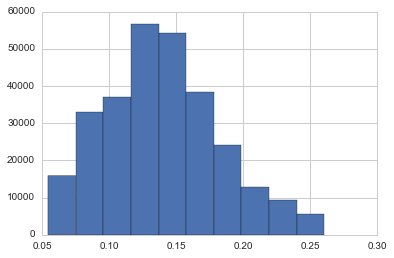

In [51]:
df.X1.hist()

In [142]:
#before moving to categorical variable selection, do some imputation
df["X25"].fillna(df.X25.median(), inplace=True)
df["X26"].fillna(df.X26.median(), inplace=True)
#df["X13"].fillna(df.X13.median(), inplace=True)
#df["X13"].fillna(df.groupby("X12")["X13"].transform("mean"), inplace=True)
df["X30"].fillna(df.X30.mean(), inplace=True)

test_df["X25"].fillna(test_df.X25.median(), inplace=True)
test_df["X26"].fillna(test_df.X26.median(), inplace=True)
test_df["X30"].fillna(test_df.X30.mean(), inplace=True)

USEFUL CATEGORICAL VARIABLE SELECTION PHASE

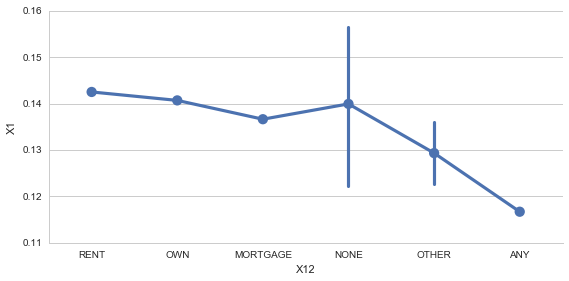

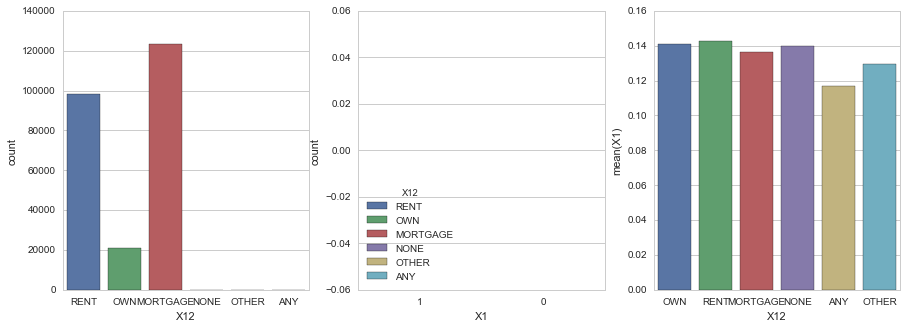

In [143]:
#Start with X12
sns.factorplot('X12','X1', data=df,size=4,aspect=2)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='X12', data=df, ax=axis1)
sns.countplot(x='X1', hue="X12", data=df, order=[1,0],ax=axis2)
own_perc = df[["X12", "X1"]].groupby(['X12'],as_index=False).mean()
sns.barplot(x='X12', y='X1', data=own_perc,order=['OWN','RENT','MORTGAGE','NONE','ANY','OTHER'],ax=axis3)

In [144]:
own_dummies  = pd.get_dummies(df['X12'])
#I saw very less quantity for the following groups and I just disregraded them
own_dummies  = own_dummies.drop(['NONE','ANY','OTHER'], axis=1)

own_dummies_test  = pd.get_dummies(test_df['X12'])
#print (own_test)
#grade_dummies_test = grade_dummies_test.drop(['NONE','ANY','OTHER'], axis=1)
df = df.join(own_dummies)
test_df    = test_df.join(own_dummies_test)

df.drop(['X12'], axis=1,inplace=True)
test_df.drop(['X12'], axis=1,inplace=True)

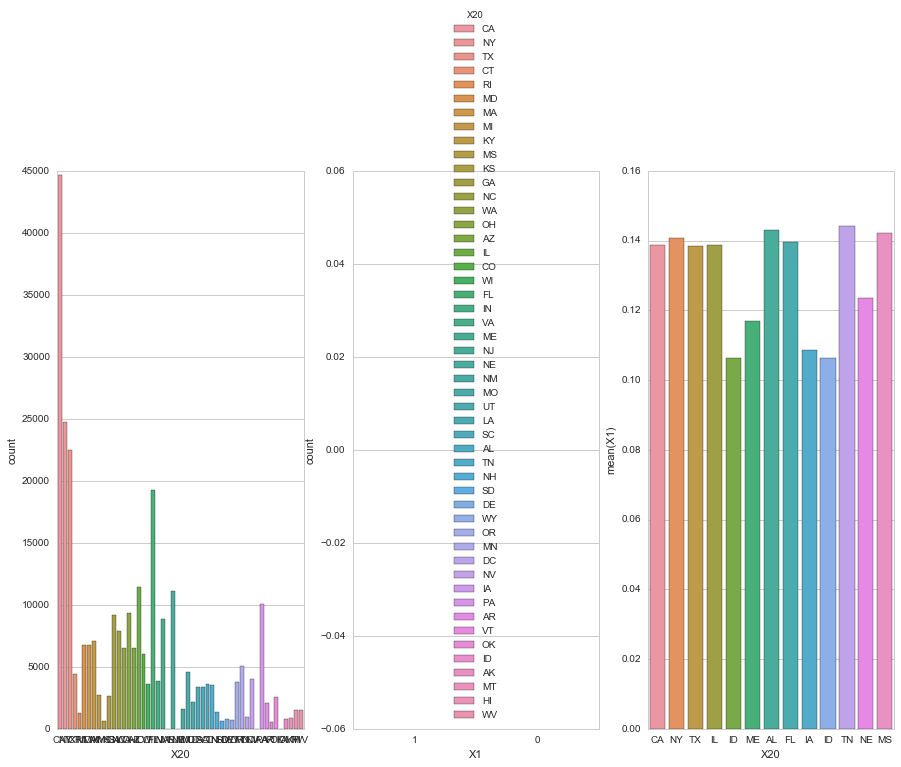

In [145]:
#This is a tricky variable, lets do our best to get some insights about their importance

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,10))
sns.countplot(x='X20', data=df, ax=axis1)
sns.countplot(x='X1', hue="X20", data=df, order=[1,0],ax=axis2)
own_perc = df[["X20", "X1"]].groupby(['X20'],as_index=False).mean()
sns.barplot(x='X20', y='X1', data=own_perc,order=['CA','NY','TX','IL','ID','ME','AL','FL','IA','ID','TN','NE','MS'],ax=axis3)

In [147]:
#After examining the plots, I have decided to focus on most frequent states for each data set
own_dummies  = pd.get_dummies(df['X20'])
own_dummies  = own_dummies.drop([col for col, val in own_dummies.sum().iteritems() if val < 10000], axis=1)

own_dummies_test  = pd.get_dummies(test_df['X20'])
#print (own_test)
own_dummies_test  = own_dummies_test.drop([col for col, val in own_dummies_test.sum().iteritems() if val < 50], axis=1)
df = df.join(own_dummies)
test_df    = test_df.join(own_dummies_test)

df.drop(['X20'], axis=1,inplace=True)
test_df.drop(['X20'], axis=1,inplace=True)


In [148]:
df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287123 entries, 0 to 399999
Data columns (total 40 columns):
X1          287123 non-null float64
X2          287123 non-null float64
X3          287123 non-null float64
X4          287123 non-null float64
X5          287123 non-null float64
X6          287123 non-null float64
X7          287123 non-null object
X8          287123 non-null float64
X9          287123 non-null float64
X10         270054 non-null object
X11         287123 non-null float64
X13         287123 non-null float64
X14         287123 non-null object
X15         287123 non-null object
X16         89124 non-null object
X17         287123 non-null object
X18         287112 non-null object
X19         287123 non-null int64
X21         287123 non-null float64
X22         287123 non-null float64
X23         287123 non-null object
X24         287123 non-null float64
X25         287123 non-null float64
X26         287123 non-null float64
X27         287123 non-null float64


In [149]:
#I need overlaps so just drop the extra ones
test_df.drop(['AK','AL','AR','AZ','CO','CT','DC','DE','GA','HI','IN','KS','KY','LA','MA','MD','MI','MN','MO','MS','MT','NC','NH','NM','NV','OH','OK','OR','RI','SC','SD','TN','UT','VA','VT','WA','WI','WV','WY'], axis=1, inplace=True)

I WOULD LIKE TO KNOW WHAT OTHER CATEGORIES THAT I CAN USE

In [103]:
def describe_caterical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes=="object"]].describe().to_html()))

In [104]:
describe_caterical(df)

,X7,X8,X9,X10,X14,X15,X16,X17,X18,X23,X32
count,338989,287123,287123,318737,338989,338989,105057,338989,338974,338989,338989
unique,2,7,35,163396,3,91,103870,14,53618,653,2
top,36 months,B,B3,Teacher,VERIFIED - income,Jul-14,,debt_consolidation,Debt consolidation,Oct-00,f
freq,247791,86121,20352,3602,127040,24797,190,198226,105698,2725,232600


In [151]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
# Go back to X25, X26 later on for better imputing
df = df.drop(['X10','X15','X16','X23','X2','X3','X18'], axis=1)#11,16,17,19,20
test_df    = test_df.drop(['X10','X15','X16','X23','X3','X18'], axis=1)

I DROPPED X16 BECAUSE ITS EMPTY IN TEST SET. I DID SOME ADDITIONAL WORK FOR THAT VARIABLE and FOUND INTERESTING RESULTS WHICH EXPLAINED IN WRITE-UP DOCUMENT.

LETS GO BACK TO OTHER CATEGORICALS WHICH MAY BE USEFUL

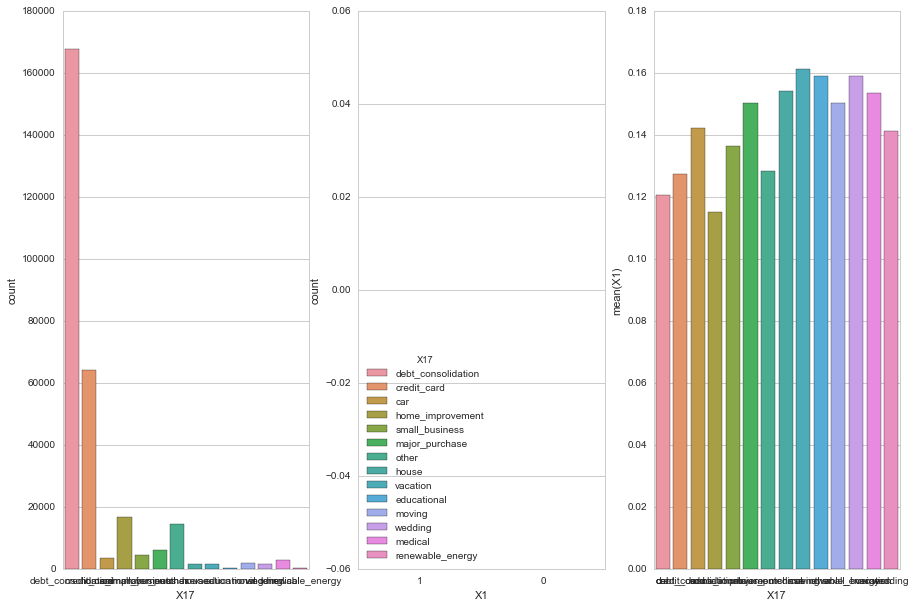

In [61]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,10))
sns.countplot(x='X17', data=df, ax=axis1)
sns.countplot(x='X1', hue="X17", data=df, order=[1,0],ax=axis2)
own_perc = df[["X17", "X1"]].groupby(['X17'],as_index=False).mean()
sns.barplot(x='X17', y='X1', data=own_perc,ax=axis3)

In [153]:
#I only interested in most frequent ones in both data sets. Credit card and debt consolidation are dominating categories in both sets
own_dummies  = pd.get_dummies(df['X17'])
own_dummies  = own_dummies.drop([col for col, val in own_dummies.sum().iteritems() if val < 50000], axis=1)

own_dummies_test  = pd.get_dummies(test_df['X17'])
#print (own_test)
own_dummies_test  = own_dummies_test.drop([col for col, val in own_dummies_test.sum().iteritems() if val < 10000], axis=1)
df = df.join(own_dummies)
test_df    = test_df.join(own_dummies_test)

df.drop(['X17'], axis=1,inplace=True)
test_df.drop(['X17'], axis=1,inplace=True)

In [155]:
#other categorical which do not require more pruning
get_dummies=pd.get_dummies(df['X7'])
get_dummies_test=pd.get_dummies(df['X7'])
df = df.join(get_dummies)
test_df    = test_df.join(get_dummies_test)
df.drop(['X7'], axis=1,inplace=True)
test_df.drop(['X7'], axis=1,inplace=True)
get_dummies=pd.get_dummies(df['X14'])
get_dummies_test=pd.get_dummies(df['X14'])
df = df.join(get_dummies)
test_df    = test_df.join(get_dummies_test)
df.drop(['X14'], axis=1,inplace=True)
test_df.drop(['X14'], axis=1,inplace=True)
get_dummies=pd.get_dummies(df['X32'])
get_dummies_test=pd.get_dummies(df['X32'])
df = df.join(get_dummies)
test_df    = test_df.join(get_dummies_test)
df.drop(['X32'], axis=1,inplace=True)
test_df.drop(['X32'], axis=1,inplace=True)

In [ ]:
test_df.info()

After making sure that Data Frames are ready for computation, we can start fitting models

In [207]:
#Start with default parameters of RF

X_train = df.drop("X1",axis=1)
Y_train = df["X1"]

X_test = test_df.drop("X1",axis=1)
X_test=X_test.drop("X2",axis=1)
X_test.fillna(0.0, inplace=True)

from sklearn import preprocessing
x = X_train.values
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x_t = X_test.values
x_scaled_t = min_max.fit_transform(x_t)
X_test = pd.DataFrame(x_scaled_t)

estimator=RandomForestRegressor(n_estimators=1000, random_state=0)
estimator.fit(X_train,Y_train)
score=cross_val_score(estimator,X_train,Y_train).mean()
print ("score with the mean imputation on numerical variables= %.2f" % score)

prediction = estimator.predict(X_test)
print (prediction)

score with the mean imputation on numerical variables= 0.94
[ 0.16283791  0.06029425  0.1402175  ...,  0.1795292   0.136828    0.12607147]


In [208]:
from sklearn.metrics import r2_score
import numpy as np
r2=r2_score(Y_train, estimator.predict(X_train))
mse = np.mean(Y_train- estimator.predict(X_train)**2)
print (r2,mse)

#Suspicious about overfitting. lets apply some tuning in parameters

0.996024318588 0.11813472962730301


In [211]:
X_train = df.drop("X1",axis=1)
Y_train = df["X1"]

X_test = test_df.drop("X1",axis=1)
X_test=X_test.drop("X2",axis=1)
X_test.fillna(0.0, inplace=True)

from sklearn import preprocessing
x = X_train.values
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x_t = X_test.values
x_scaled_t = min_max.fit_transform(x_t)
X_test = pd.DataFrame(x_scaled_t)

estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=5)
estimator.fit(X_train,Y_train)
score=cross_val_score(estimator,X_train,Y_train).mean()
print ("score with the mean imputation on numerical variables= %.2f" % score)

prediction = estimator.predict(X_test)
print (prediction)

score with the mean imputation on numerical variables= 0.94
[ 0.16536466  0.06029448  0.14249867 ...,  0.17943761  0.13240013
  0.12634876]


There is still possibility for overfitting so lets increase the cv to 10 folds

In [214]:
X_train = df.drop("X1",axis=1)
Y_train = df["X1"]

X_test = test_df.drop("X1",axis=1)
X_test=X_test.drop("X2",axis=1)
X_test.fillna(0.0, inplace=True)

from sklearn import preprocessing
x = X_train.values
min_max = preprocessing.MinMaxScaler()
x_scaled = min_max.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x_t = X_test.values
x_scaled_t = min_max.fit_transform(x_t)
X_test = pd.DataFrame(x_scaled_t)

estimator=RandomForestRegressor(n_estimators=200, n_jobs=+1, random_state=0, max_features="auto")
estimator.fit(X_train,Y_train)
score=cross_val_score(estimator,X_train,Y_train,cv=10).mean()
print ("score with the mean imputation on numerical variables= %.2f" % score)

prediction = estimator.predict(X_test)
print (prediction)

score with the mean imputation on numerical variables= 0.95
[ 0.16274484  0.06029452  0.14103363 ...,  0.17976416  0.13667001
  0.12603993]


In [217]:
submission=pd.DataFrame({"X1":prediction})
submission.to_csv('RandomForest_Predics.csv',index=False)

In [74]:
from sklearn.metrics import r2_score
import numpy as np
r2=r2_score(Y_train, estimator.predict(X_train))
mse = np.mean(Y_train- estimator.predict(X_train)**2)
print (r2,mse)

0.996195877793 0.11812944891469783


Overall, results look consistent. I want to look at important features but I am sure there willl be at least one dominator

In [75]:
estimator.feature_importances_

array([  1.40503784e-03,   1.05311023e-03,   2.83247250e-03,
         2.57899638e-02,   9.38328710e-01,   1.07797737e-03,
         2.21688003e-03,   1.84722390e-03,   9.69699628e-04,
         3.26819889e-03,   2.38969514e-04,   7.71583231e-04,
         1.42185599e-03,   1.60919861e-03,   1.68358983e-03,
         1.57522300e-04,   3.14240304e-03,   3.01469891e-03,
         1.95978704e-03,   2.45723811e-04,   1.55147288e-04,
         2.56470700e-04,   9.61897362e-05,   1.81937207e-04,
         9.15992368e-05,   1.94077110e-04,   1.26197215e-04,
         1.21247671e-04,   1.15555192e-04,   1.04121930e-04,
         9.05734136e-05,   8.69330589e-05,   9.58475753e-05,
         1.28694883e-04,   1.71011751e-04,   1.21135996e-04,
         1.24727166e-04,   1.86488346e-04,   1.25239102e-04,
         8.44659108e-05,   2.07390504e-04,   2.52134489e-04,
         1.36131552e-04,   1.19790252e-04,   1.87288216e-04,
         4.55831332e-04,   3.93757096e-04,   8.95266039e-04,
         2.54414981e-04,

Feature ranking:
1. feature 4 (0.938329)
2. feature 3 (0.025790)
3. feature 9 (0.003268)
4. feature 16 (0.003142)
5. feature 17 (0.003015)
6. feature 2 (0.002832)
7. feature 6 (0.002217)
8. feature 18 (0.001960)
9. feature 7 (0.001847)
10. feature 14 (0.001684)
11. feature 13 (0.001609)
12. feature 12 (0.001422)
13. feature 0 (0.001405)
14. feature 5 (0.001078)
15. feature 1 (0.001053)
16. feature 8 (0.000970)
17. feature 47 (0.000895)
18. feature 11 (0.000772)
19. feature 51 (0.000520)
20. feature 45 (0.000456)
21. feature 49 (0.000450)
22. feature 50 (0.000436)
23. feature 46 (0.000394)
24. feature 21 (0.000256)
25. feature 48 (0.000254)
26. feature 41 (0.000252)
27. feature 19 (0.000246)
28. feature 10 (0.000239)
29. feature 40 (0.000207)
30. feature 25 (0.000194)
31. feature 44 (0.000187)
32. feature 37 (0.000186)


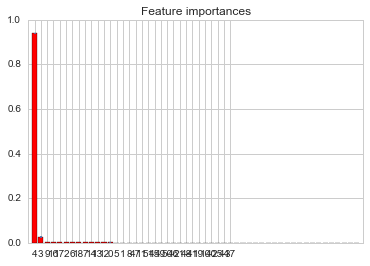

In [76]:
importances = estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in estimator.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [176]:
a=np.histogram(prediction)

In [61]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.710145,0.710145,0.545143,0.166667,0.220339,0.000000,0.010938,0.487122,0.0,0.000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.188406,0.188406,0.019229,0.166667,0.237288,0.000000,0.008270,0.357339,0.0,0.000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.710145,0.710145,0.706429,0.500000,0.542373,0.000000,0.008937,0.262566,0.0,0.000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.020290,0.020290,0.034286,0.333333,0.355932,1.000000,0.006803,0.136784,0.0,0.000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.298551,0.298551,0.305486,0.333333,0.372881,0.555556,0.003868,0.290823,0.0,0.125,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


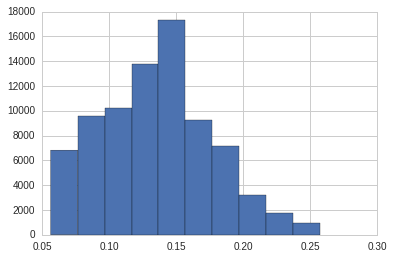

In [179]:
import matplotlib.pyplot as plt
plt.hist(prediction)
plt.show()

Examine a boosting algorithm with default settings instead of a bagging method (RF)

In [181]:
from sklearn.ensemble import AdaBoostRegressor

In [182]:
est=AdaBoostRegressor(random_state=42)

In [183]:
est.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=42)

In [185]:
#print(est.oob_score_)
#y_oob=estimator.oob_prediction_
#print ("C-stat: ", roc_auc_score(Y_train, estimator.oob_prediction_))
print ("score with the mean imputation on numerical variables= %.2f" % score)

prediction = est.predict(X_test)
print (prediction)

score with the mean imputation on numerical variables= 0.94
[ 0.1509832   0.0709794   0.14171013 ...,  0.15851094  0.14245031
  0.13067043]


Results seem consistent for both models but I want to boost with Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

est=GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=2, random_state=0, loss='ls').fit(X_train,Y_train)

score=cross_val_score(est,X_train,Y_train,cv=8).mean()#I dont want to risk overfitting and using K folds
print (score1)


from sklearn.metrics import r2_score
import numpy as np
r2=r2_score(Y_train, est.predict(X_train))
mse = np.mean(Y_train- est.predict(X_train)**2)
print (r2,mse)
prediction = est.predict(X_test)

submission=pd.DataFrame({"X1":prediction})
submission.to_csv('GradientBoost.csv',index=False)

I ran above code in a different machine to save some processing time. Code output is as follows:
0.94999715624
0.97110366382  0.11814791188

FEATURE ENGINEERING

In [ ]:
%%timeit
model=RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X_train,Y_train)

In [ ]:
%%timeit
model=RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X_train,Y_train)

In [ ]:
results=[]
n_estimator_options=[30,50,100,200,500,1000,2000]
for trees in n_estimator_options:
    model=RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train,Y_train)
    print (trees, "trees")
    score=cross_val_score(model,X_train,Y_train,cv=10).mean()
    print (score)
    print(model.oob_score_)
    results.append(model.oob_score_)
pd.Series(results,n_estimator_options).plot();

30 trees
0.949957427922
0.96891767578
50 trees
0.950348896704
0.970185977692
100 trees
